<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [178]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [179]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [180]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [181]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

# model = Sequential()
# model.add(Dense(n_dense,
#                 input_dim=n_input,
#                 kernel_initializer=w_init,
#                 bias_initializer=b_init))
# model.add(Activation('sigmoid'))

In [182]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 1.5))

model.add(layers.Dense(neurons * 8, activation='tanh', kernel_regularizer=regularizers.l2(lern_rat)))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [183]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 168ms/step


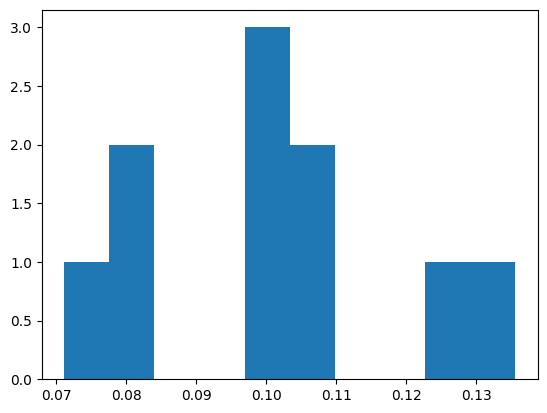

In [184]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [185]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=12,
                                   restore_best_weights=True,
                                   )

In [186]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=128,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/300
391/391 [==============================] - 8s 9ms/step - loss: 1.3685 - accuracy: 0.7466 - val_loss: 0.9353 - val_accuracy: 0.8342
Epoch 2/300
391/391 [==============================] - 3s 8ms/step - loss: 0.8711 - accuracy: 0.8158 - val_loss: 0.6625 - val_accuracy: 0.8526
Epoch 3/300
391/391 [==============================] - 4s 9ms/step - loss: 0.6417 - accuracy: 0.8338 - val_loss: 0.5269 - val_accuracy: 0.8514
Epoch 4/300
391/391 [==============================] - 3s 8ms/step - loss: 0.5252 - accuracy: 0.8419 - val_loss: 0.4426 - val_accuracy: 0.8636
Epoch 5/300
391/391 [==============================] - 3s 8ms/step - loss: 0.4717 - accuracy: 0.8499 - val_loss: 0.4109 - val_accuracy: 0.8707
Epoch 6/300
391/391 [==============================] - 3s 8ms/step - loss: 0.4382 - accuracy: 0.8578 - val_loss: 0.4187 - val_accuracy: 0.8680
Epoch 7/300
391/391 [==============================] - 4s 9ms/step - loss: 0.4251 - accuracy: 0.8588 - val_loss: 0.3835 - val_accuracy: 0.8757

In [187]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


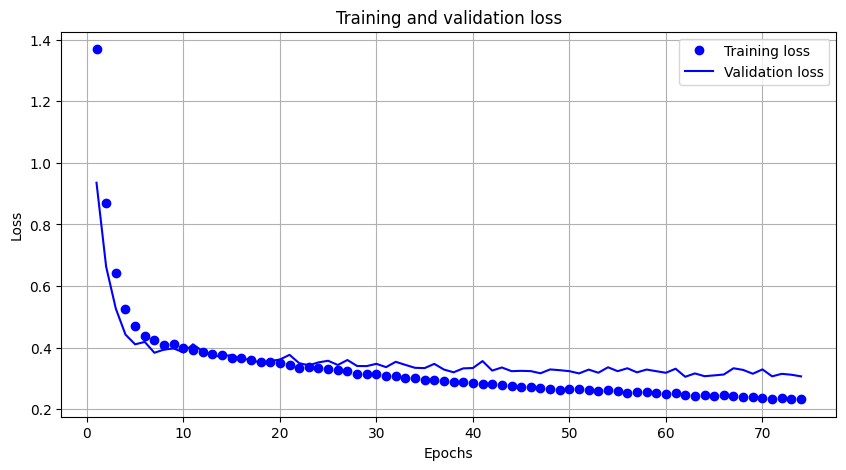

<Figure size 640x480 with 0 Axes>

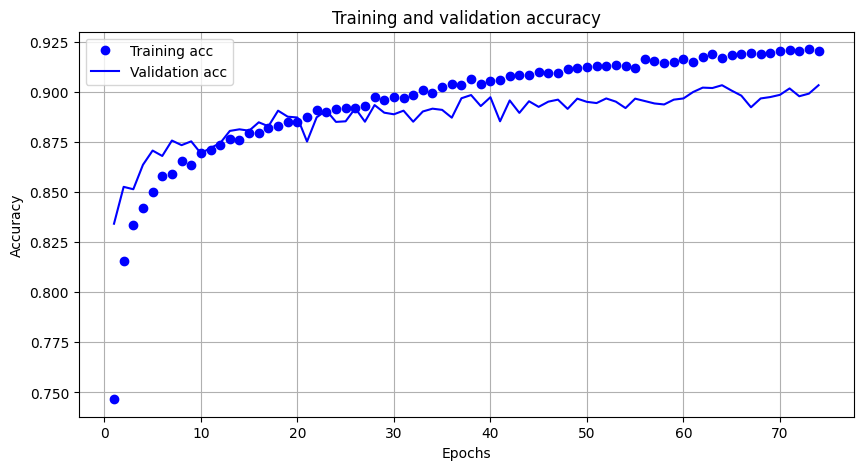

In [188]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [189]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [190]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [191]:
predictions[0]

array([0.08540209, 0.08539332, 0.08539643, 0.08540995, 0.08539601,
       0.08549988, 0.08539958, 0.0856339 , 0.08539345, 0.23107539],
      dtype=float32)

In [192]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dropout_44 (Dropout)        (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 128)               100480    
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_33 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_45 (Dropout)        (None, 256)               0         
                                                     